# O arquivo utilizado antes do projeto rodar está sem a previsão dos dados. Após a execução do código, o arquivo terá a previsão incluída de forma automática.

In [1]:
### Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [2]:
# Carregando o arquivo Excel que se encontra na pasta do projeto
df = pd.read_excel('dataset_processo_seletivo.xlsx', engine='openpyxl')

#função de regressão linear
linear = LinearRegression()

# Variáveis preditoras
x = df.loc[1:161, ['ici', 'pim', 'receita', 'ic_br_energia', 'preco_diesel', 'preco_etanol', 'reservas_internacionais', 'pmc_moveis_linha_branca', 'pmc_combustiveis_lubrificantes', 'pmc_roupa_calcados', 'pmc_alimentos_bebidas', 'selic_meta', 'pim_bens_consumo', 'pim_manufatura', 'pim_bens_intermediarios' , 'pim_bens_capital']]
x = np.array(x)           

# Variável alvo
y = df.loc[1:161, ['abcr_leves']]
y = np.array(y)

## Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")

Tamanho X de treino: (128, 16)
Tamanho X de teste: (33, 16)
Tamanho y de treino: (128, 1)
Tamanho y de teste: (33, 1)


In [3]:
# Treinando modelos
linear.fit(X_train, y_train)

LinearRegression()

In [4]:
#Prevendo valores
y_predict = linear.predict(X_test)

In [5]:
#Avaliando o modelo
mse = mean_squared_error(y_test, y_predict)
print("MSE:", mse)

MSE: 72.81993509158889


In [6]:
y = []

pergunta = df.loc[162:253, ['ici', 'pim', 'receita', 'ic_br_energia', 'preco_diesel', 'preco_etanol', 'reservas_internacionais', 'pmc_moveis_linha_branca', 'pmc_combustiveis_lubrificantes', 'pmc_roupa_calcados', 'pmc_alimentos_bebidas', 'selic_meta', 'pim_bens_consumo', 'pim_manufatura', 'pim_bens_intermediarios' , 'pim_bens_capital']]
total_celulas = pergunta.ici.count()
pergunta = np.array(pergunta)

resposta = linear.predict(pergunta)

for i in range(total_celulas):
    print(f"Variável ABCR previsão: {resposta[i][0]}")
    novoelemento = resposta[i][0]
    y.append(novoelemento)  # Usando o 'append' para adicionar valores ao array

# Verificando se o comprimento de 'y' é igual ao número de linhas no Dataset
if len(y) == len(df) - 162:  # Subtrai 162 para corresponder às linhas que estamos atualizando
    coluna_destino = 'abcr_leves'
    df.loc[162:, coluna_destino] = y  # Substituindo os valores da coluna pelo array 'y'

    # Salvando o Dataset de volta no arquivo Excel
    df.to_excel('dataset_processo_seletivo.xlsx', index=False, engine='openpyxl')
else:
    print("O comprimento de 'y' não corresponde ao número de linhas no DataFrame.")

Variável ABCR previsão: 174.30317200047836
Variável ABCR previsão: 166.71504675927548
Variável ABCR previsão: 171.4129743767356
Variável ABCR previsão: 188.34588326181012
Variável ABCR previsão: 168.20449859838484
Variável ABCR previsão: 189.39137209203727
Variável ABCR previsão: 189.98349658036938
Variável ABCR previsão: 157.5921083218794
Variável ABCR previsão: 164.28507831325797
Variável ABCR previsão: 166.41186183770105
Variável ABCR previsão: 155.26992127908892
Variável ABCR previsão: 158.04622707483702
Variável ABCR previsão: 177.61467918969333
Variável ABCR previsão: 172.1130966840596
Variável ABCR previsão: 176.71488463064549
Variável ABCR previsão: 192.10900684514306
Variável ABCR previsão: 173.1900624934176
Variável ABCR previsão: 195.97044875662505
Variável ABCR previsão: 192.04067621178012
Variável ABCR previsão: 162.42641790564414
Variável ABCR previsão: 170.10822151815626
Variável ABCR previsão: 172.21339010267778
Variável ABCR previsão: 160.93446428478208
Variável ABCR p

# A partir daqui, as previsões já foram incluidas no arquivo original.

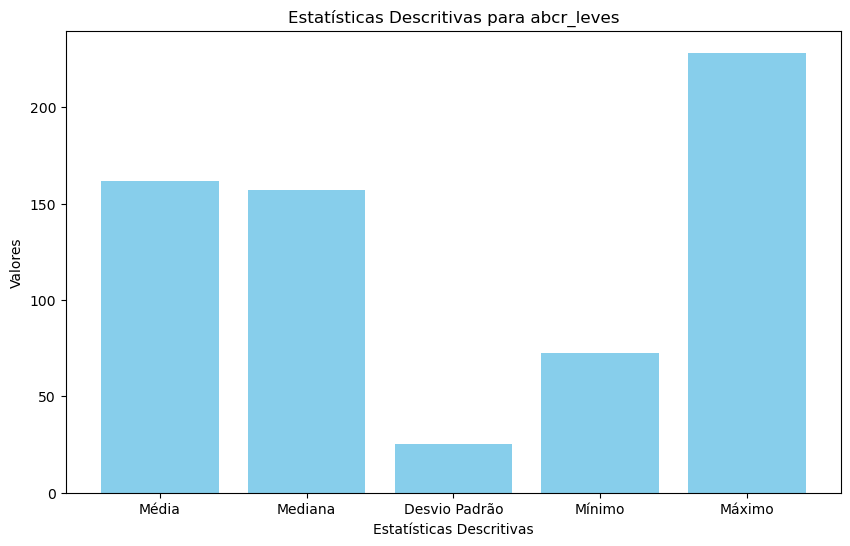

Média: 161.72704791816025
Mediana: 157.0519950517505
Desvio Padrão: 25.36299544533374
Mínimo: 72.4875295830798
Máximo: 228.33279471579425


In [7]:
# Calculando as estatísticas descritivas para 'abcr_leves', a fim de fazer a Análise exploratoria dos dados
desc_stats = df['abcr_leves'].describe()

# Extraindo os valores específicos que desejamos (média, mediana, desvio padrão, mínimo e máximo)
media = desc_stats['mean']
mediana = desc_stats['50%']  # '50%' é o valor da mediana
desvio_padrao = desc_stats['std']
minimo = desc_stats['min']
maximo = desc_stats['max']


# Dados das estatísticas descritivas
estatisticas = {
    'Média': media,
    'Mediana': mediana,
    'Desvio Padrão': desvio_padrao,
    'Mínimo': minimo,
    'Máximo': maximo
}

# Convertendo os dados em listas para plotagem
nomes = estatisticas.keys()
valores = estatisticas.values()

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))  # Defina o tamanho da figura
plt.bar(nomes, valores, color='skyblue')  # Plote as barras com cores personalizadas

# Adicionando rótulos aos eixos
plt.xlabel('Estatísticas Descritivas')
plt.ylabel('Valores')

# Adicionando título ao gráfico
plt.title('Estatísticas Descritivas para abcr_leves')

# Mostrando o gráfico
plt.show()

# Imprimindo as estatísticas descritivas
print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
print("Mínimo:", minimo)
print("Máximo:", maximo)

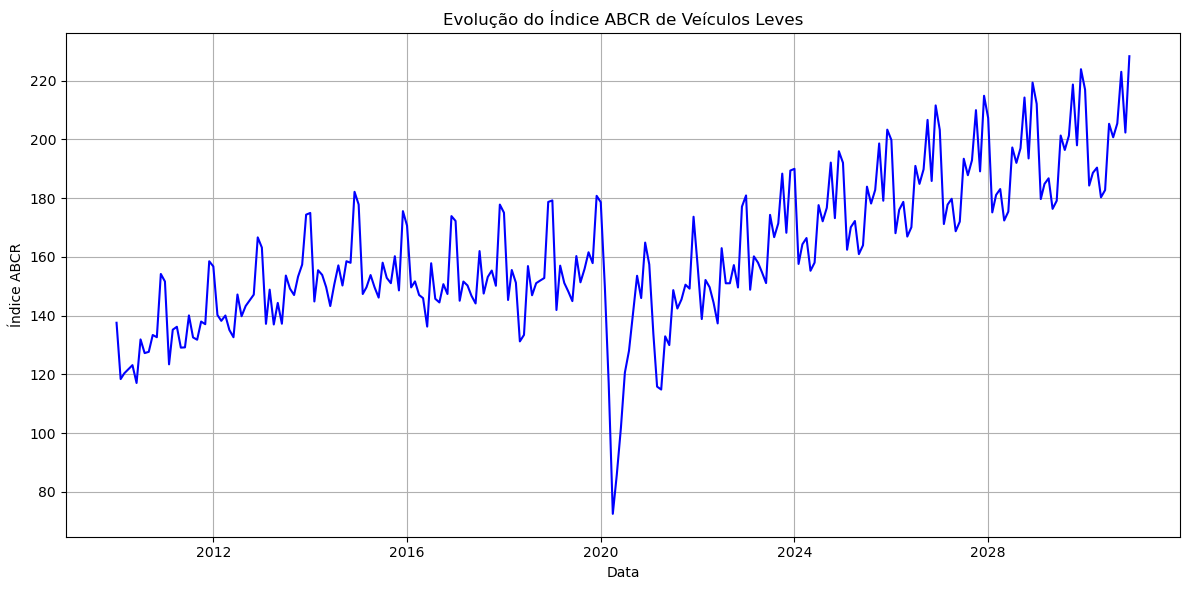

In [8]:
plt.figure(figsize=(12, 6)) 
plt.plot(df['data'], df['abcr_leves'], marker='', linestyle='-', color='b')
plt.title('Evolução do Índice ABCR de Veículos Leves')
plt.xlabel('Data')
plt.ylabel('Índice ABCR')
plt.grid(True)

# Mostrando o gráfico
plt.tight_layout()
plt.show()

# Conclusão:

Podemos ver através dos gráficos que é esperado que a variável 'abcr_leves' apresente um crescimento, conforme estava ocorrendo desde 2021. 
Esse crescimento não é uniforme, ou seja, durante alguns períodos a variável cai, e depois volta a crescer.